# 08 Model 3 - Neural Network

# Contents

1. Introduction
2. Defining our Neural Network Model architecture
3. Performing coarse analysis
4. Trying a tuned Neural Network model
5. Model evaluation
6. Conclusion and next steps

# 1. Introduction

In this notebook - the final model type we will be building and tuning - we'll build upon our previous work with the Random Forest model by constructing and fine-tuning a Neural Network for classification. Neural networks are powerful models capable of capturing complex nonlinear relationships in data, which might be missed by ensemble methods like Random Forests.

Our objectives are to:

1. To potentially improve model performance over the Random Forest, or compare performance
2. Perform coarse analysis on key hyperparameters, including epochs, learning rate, and regularisation strength.
3. Use techniques like dropout layers and early stopping to prevent overfitting.
4. Evaluate the model's performance and compare it with the Random Forest results, particularly focusing on the confusion matrix.

Why explore neural networks?

1. Neural networks can model complex interactions between features due to their deep and nonlinear architecture.
2. We aim to improve classification metrics such as precision, recall, F1-score, and overall accuracy, which are reflected in the confusion matrix.

First, let's load important libraries:

In [5]:
import time
import pandas as pd          
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

And let's load in our datasets:

In [6]:
import joblib

# Load the saved data
X_train_resampled_df = joblib.load('../preprocessed_variables/X_train_resampled_df.pkl')
X_test_scaled_df = joblib.load('../preprocessed_variables/X_test_scaled_df.pkl')
y_train_resampled = joblib.load('../preprocessed_variables/y_train_resampled.pkl')
y_test = joblib.load('../preprocessed_variables/y_test.pkl')

# Verify the loaded data
print(X_train_resampled_df.shape, y_train_resampled.shape)
print(X_test_scaled_df.shape, y_test.shape)


(370990, 325) (370990,)
(88597, 325) (88597,)


# 2. Defining our Neural Network Model architecture

The neural network model defined below consists of:

* An input layer connected to two hidden layers. The input layer takes data with dimensions matching the number of features in `X_train_resampled`.

* The first hidden layer has 60 neurons, uses the ReLU activation function to introduce non-linearity, and includes L2 regularization to prevent overfitting.

* A dropout layer with a rate of 0.2 follows the first hidden layer, randomly dropping neurons during training for regularisation.

* Another dropout layer with a rate of 0.2 follows the second hidden layer for additional regularisation.

* The output layer contains a single neuron with a sigmoid activation function, which outputs the probability of the positive class, making it suitable for binary classification.

* The model is compiled using the Adam optimizer and binary crossentropy as the loss function, with accuracy as the evaluation metric.

In [8]:
def create_nn(learning_rate=0.001, dropout_rate=0.2, weight_regularizer=0.0):

    """
    Creates a Neural Network model using Keras Sequential API.

    Args:
        learning_rate (float): The learning rate for the Adam optimizer. Default is 0.001.
        dropout_rate (float): Dropout rate for regularization to prevent overfitting. Default is 0.2.
        weight_regularizer (float): L2 regularization weight to penalize large weights. Default is 0.0.

    Returns:
        model (Sequential): A compiled Keras model ready for training.
    """


    # Create a Sequential model
    model = Sequential()
    
    # Define the L2 regularizer
    regularizer = regularizers.l2(weight_regularizer)
    
    # Input layer and first hidden layer with 60 neurons
    model.add(layers.Dense(
        60,                                   # Reduced number of neurons
        activation="relu",                    # Activation function
        kernel_regularizer=regularizer,       # L2 regularization
        input_dim=X_train_resampled_df.shape[1]  # Input dimensions
    ))
    model.add(layers.Dropout(dropout_rate))   # Dropout layer for regularization
    
    # Second hidden layer 
    model.add(layers.Dense(60, activation="relu", kernel_regularizer=regularizer))
    model.add(layers.Dropout(dropout_rate))   # Dropout for regularization
    
    # Output layer (binary classification)
    model.add(layers.Dense(1, activation="sigmoid"))
    
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='binary_crossentropy',  # Loss function for binary classification
        optimizer=optimizer,         # Optimizer
        metrics=['accuracy']         # Metric to evaluate during training
    )
    
    return model


We're now ready to apply this function to perform coarse analysis:

# 3. Performing coarse analysis

We'll focus on three key hyperparameters during our tuning process:

- **Epochs**
- **Regularisation strength**
- **Learning rate**

While hyperparameter tuning often benefits from comprehensive cross-validation, conducting a 5-fold cross-validation for each hyperparameter in this case is computationally limiting.

However, to ensure that we still capture meaningful insights into model generalization, we use a **validation split of 0.2** (20% of the training data) for each run. This helps simulate cross-validation by holding out part of the data to evaluate the model's performance on unseen data while tuning.

### Learning Rate and Cross-Validation
We do apply **cross-validation specifically for tuning the learning rate**, as it is a critical hyperparameter that greatly impacts the model’s ability to converge to an optimal solution. The learning rate controls how much the model adjusts during each update, and its choice is crucial to avoid issues such as:
- **Overfitting**: If the learning rate is too high, the model might fail to settle on a good solution, jumping too far and overshooting the optimal values, which leads to poor performance on unseen data.
- **Underfitting**: If the learning rate is too low, the model may not converge efficiently, getting stuck in a suboptimal region of the solution space.

By applying cross-validation to the learning rate, we can test different values across various subsets of the data and mitigate these risks, ensuring the model generalizes well and reduces the chances of overfitting.

While we sacrifice the exhaustive computational effort for other hyperparameters, this approach still enables us to capture meaningful performance trends and optimize the model efficiently.


Moving forward with out coarse analysis:

# (a) Epochs

We perform coarse analysis on this hyperparameter to determine the optimal number of epochs to balance underfitting and overfitting.


Starting coarse analysis for 'epochs'...

Training with epochs=10
Training in progress...


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8443 - loss: 0.4165 - val_accuracy: 0.8456 - val_loss: 0.4233
Epoch 2/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3472 - val_accuracy: 0.8412 - val_loss: 0.4173
Epoch 3/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3429 - val_accuracy: 0.8444 - val_loss: 0.4083
Epoch 4/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8662 - loss: 0.3372 - val_accuracy: 0.8396 - val_loss: 0.4370
Epoch 5/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.8687 - loss: 0.3356 - val_accuracy: 0.8486 - val_loss: 0.4179
Epoch 6/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8725 - loss: 0.3312 - val_accuracy: 0.8548 - val_loss: 0.3915
Epoch 7/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.8751 - loss: 0.3253 - val_accuracy: 0.8626 - val_loss: 0.3775
Epoch 8/10
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.8761 - loss:

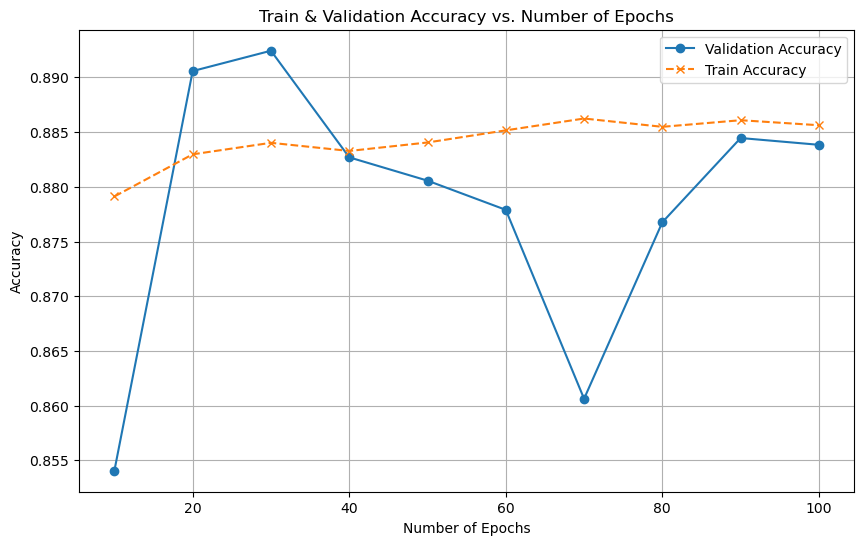

In [9]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# Initialize lists to store results
train_accuracies_epochs = []
val_accuracies_epochs = []
training_times_epochs = []

# List of epoch values to try
epochs_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print("\nStarting coarse analysis for 'epochs'...")

# Create the model once
model = create_nn(learning_rate=0.001, weight_regularizer=0.001)

for epochs in epochs_list:
    print(f"\nTraining with epochs={epochs}")
    start_time = time.time()
    
    # Clear previous model states
    K.clear_session()

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model using validation_split instead of validation_data
    print("Training in progress...")
    history = model.fit(
        X_train_resampled_df, y_train_resampled,
        validation_split=0.2,  # Use 20% of training data for validation
        epochs=epochs,
        batch_size=128,
        callbacks=[early_stopping],
        verbose=1  # Set to 1 to see training progress
    )
    
    elapsed_time = time.time() - start_time
    training_times_epochs.append(elapsed_time)
    
    # Get the last epoch's accuracy
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    
    train_accuracies_epochs.append(train_accuracy)
    val_accuracies_epochs.append(val_accuracy)
    
    print(f"Completed in {elapsed_time:.2f} seconds")
    print(f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, val_accuracies_epochs, marker='o', label='Validation Accuracy')
plt.plot(epochs_list, train_accuracies_epochs, marker='x', label='Train Accuracy', linestyle='--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train & Validation Accuracy vs. Number of Epochs')
plt.grid(True)
plt.legend()
plt.show()


### Finding the maximum number of epochs:


In [10]:
# val_accuracies_epochs contains the validation accuracies for each epoch
# epochs_list contains the corresponding epoch numbers

# Find the maximum validation accuracy
max_val_acc = max(val_accuracies_epochs)
max_val_acc_epoch_idx = val_accuracies_epochs.index(max_val_acc)  # Get the index of the max validation accuracy
best_epoch = epochs_list[max_val_acc_epoch_idx]  # Get the corresponding epoch from epochs_list

print(f"The maximum validation accuracy of {max_val_acc:.4f} was achieved at epoch {best_epoch}.")


The maximum validation accuracy of 0.8924 was achieved at epoch 30.


Given our coarse analysis above, we can explore 30 epochs as our tuned hyperparameter.

# (b) Regularisation strength

Regularisation strength refers to the amount of penalty imposed on a model’s complexity during training. The idea behind regularization is to prevent overfitting, where the model becomes too specialized in the training data and performs poorly on unseen data


Starting coarse analysis for 'regularization strength'...

Training with regularization strength=0.0
Epoch 1/80


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8450 - loss: 0.3655 - val_accuracy: 0.8319 - val_loss: 0.4204
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8732 - loss: 0.3047 - val_accuracy: 0.8462 - val_loss: 0.4010
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8881 - loss: 0.2748 - val_accuracy: 0.8740 - val_loss: 0.3358
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.8928 - loss: 0.2622 - val_accuracy: 0.8929 - val_loss: 0.2933
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.8975 - loss: 0.2503 - val_accuracy: 0.9131 - val_loss: 0.2450
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9022 - loss: 0.2401 - val_accuracy: 0.9176 - val_loss: 0.2441
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9041 - loss: 0.2349 - val_accuracy: 0.9088 - val_loss: 0.2582
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9071 - loss: 0.2281 - val

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 996us/step - accuracy: 0.8453 - loss: 0.3769 - val_accuracy: 0.8339 - val_loss: 0.4417
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.8672 - loss: 0.3285 - val_accuracy: 0.8613 - val_loss: 0.3784
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.8773 - loss: 0.3088 - val_accuracy: 0.8923 - val_loss: 0.3205
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.8833 - loss: 0.2985 - val_accuracy: 0.8787 - val_loss: 0.3527
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8884 - loss: 0.2872 - val_accuracy: 0.9039 - val_loss: 0.3056
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.8920 - loss: 0.2821 - val_accuracy: 0.9108 - val_loss: 0.2779
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.8938 - loss: 0.2783 - val_accuracy: 0.9173 - val_loss: 0.2680
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8957 - loss: 0.27

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - accuracy: 0.8392 - loss: 0.4188 - val_accuracy: 0.8178 - val_loss: 0.4527
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8584 - loss: 0.3498 - val_accuracy: 0.8275 - val_loss: 0.4385
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8626 - loss: 0.3441 - val_accuracy: 0.8338 - val_loss: 0.4494
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8666 - loss: 0.3384 - val_accuracy: 0.8710 - val_loss: 0.3540
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8706 - loss: 0.3336 - val_accuracy: 0.8624 - val_loss: 0.3856
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.8732 - loss: 0.3287 - val_accuracy: 0.8555 - val_loss: 0.4059
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8751 - loss: 0.3257 - val_accuracy: 0.8787 - val_loss: 0.3551
Completed in 15.71 seconds
Train Accuracy: 0.8748, Validation Accuracy: 0.8787

Trainin

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 952us/step - accuracy: 0.8403 - loss: 0.5779 - val_accuracy: 0.8063 - val_loss: 0.4674
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8523 - loss: 0.3673 - val_accuracy: 0.7743 - val_loss: 0.5441
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8518 - loss: 0.3658 - val_accuracy: 0.7756 - val_loss: 0.5330
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.8527 - loss: 0.3654 - val_accuracy: 0.8339 - val_loss: 0.4404
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.8538 - loss: 0.3643 - val_accuracy: 0.8449 - val_loss: 0.4131
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.8530 - loss: 0.3630 - val_accuracy: 0.7872 - val_loss: 0.5228
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8531 - loss: 0.3640 - val_accuracy: 0.7921 - val_loss: 0.5061
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.8547 - loss: 0.36

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8203 - loss: 1.9495 - val_accuracy: 0.7364 - val_loss: 0.6089
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.8431 - loss: 0.4119 - val_accuracy: 0.7829 - val_loss: 0.5398
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8456 - loss: 0.4001 - val_accuracy: 0.8125 - val_loss: 0.4804
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8455 - loss: 0.3970 - val_accuracy: 0.7769 - val_loss: 0.5437
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.8472 - loss: 0.3912 - val_accuracy: 0.8051 - val_loss: 0.4878
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8468 - loss: 0.3899 - val_accuracy: 0.8008 - val_loss: 0.5013
Completed in 14.45 seconds
Train Accuracy: 0.8459, Validation Accuracy: 0.8008


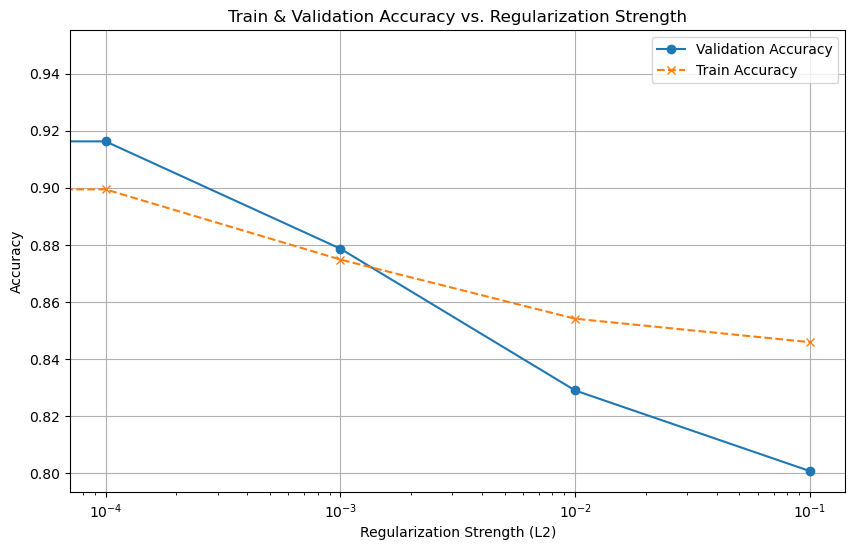

In [12]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# List of regularization strengths to test (L2 regularization)
regularization_strengths = [0.0, 0.0001, 0.001, 0.01, 0.1]

# Initialize lists to store results
train_accuracies_reg = []
val_accuracies_reg = []
training_times_reg = []

print("\nStarting coarse analysis for 'regularization strength'...")

# Loop through each regularization strength
for reg_strength in regularization_strengths:
    print(f"\nTraining with regularization strength={reg_strength}")
    start_time = time.time()
    
    # Clear previous models from memory
    K.clear_session()
    
    # Create the model with the varying regularization strength
    model = create_nn(
        learning_rate=0.001,         # Keep the learning rate constant
        weight_regularizer=reg_strength  # Vary the regularization strength
    )
    
    # Implement early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model using validation_split to avoid test set usage
    history = model.fit(
        X_train_resampled_df, y_train_resampled,
        validation_split=0.2,        # 20% of training data for validation
        epochs=80,                   # Use fixed epochs based on previous analysis
        batch_size=128,
        callbacks=[early_stopping],
        verbose=1  # Set to 1 to see training progress
    )
    
    # Calculate the elapsed training time
    elapsed_time = time.time() - start_time
    training_times_reg.append(elapsed_time)
    
    # Get the last epoch's accuracy
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    
    # Store accuracies
    train_accuracies_reg.append(train_accuracy)
    val_accuracies_reg.append(val_accuracy)
    
    # Print results for the current regularization strength
    print(f"Completed in {elapsed_time:.2f} seconds")
    print(f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(regularization_strengths, val_accuracies_reg, marker='o', label='Validation Accuracy')
plt.plot(regularization_strengths, train_accuracies_reg, marker='x', label='Train Accuracy', linestyle='--')
plt.xscale('log')  # Log scale for regularization strength
plt.xlabel('Regularization Strength (L2)')
plt.ylabel('Accuracy')
plt.title('Train & Validation Accuracy vs. Regularization Strength')
plt.grid(True)
plt.legend()
plt.show()


Given the coarse analysis above, it looks like 10^-4 is suitable as a tuned hyperparameter, given that validation accuracy declines following this.

# (c) Learning rate

The learning rate is one of the most crucial hyperparameters in training a neural network because it controls how much the model adjusts its weights with respect to the gradient of the loss function. A well-tuned learning rate allows the model to converge quickly and effectively:

* Too high of a learning rate causes the model to overshoot optimal weights, leading to poor convergence or even divergence, where the loss keeps increasing.
* Too low of a learning rate results in very slow training, where the model takes too many iterations to converge or gets stuck in a local minimum.

### This time, let's explore applying k-fold cross validation for help us tune this hyperparameter:


Starting K-fold cross-validation for 'learning_rate'...

Training with learning_rate=0.01


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8465 - loss: 0.3854 - val_accuracy: 0.8589 - val_loss: 0.3614
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.8563 - loss: 0.3734 - val_accuracy: 0.8592 - val_loss: 0.3650
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8588 - loss: 0.3699 - val_accuracy: 0.8635 - val_loss: 0.3547
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.8599 - loss: 0.3681 - val_accuracy: 0.8665 - val_loss: 0.3511
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.8620 - loss: 0.3663 - val_accuracy: 0.8680 - val_loss: 0.3522
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8616 - loss: 0.3679 - val_accuracy: 0.8660 - val_loss: 0.3517
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8614 - loss: 0.3657 - val_accuracy: 0.8689 - val_loss: 0.3484
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8632 - l

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.8471 - loss: 0.3831 - val_accuracy: 0.8617 - val_loss: 0.3585
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.8575 - loss: 0.3713 - val_accuracy: 0.8642 - val_loss: 0.3531
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.8585 - loss: 0.3675 - val_accuracy: 0.8656 - val_loss: 0.3498
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.8592 - loss: 0.3684 - val_accuracy: 0.8674 - val_loss: 0.3488
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.8606 - loss: 0.3682 - val_accuracy: 0.8716 - val_loss: 0.3458
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8623 - loss: 0.3634 - val_accuracy: 0.8707 - val_loss: 0.3448
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.8621 - loss: 0.3647 - val_accuracy: 0.8702 - val_loss: 0.3477
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.8623 - loss: 0.36

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - accuracy: 0.8482 - loss: 0.3832 - val_accuracy: 0.8587 - val_loss: 0.3604
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.8576 - loss: 0.3715 - val_accuracy: 0.8616 - val_loss: 0.3592
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.8587 - loss: 0.3700 - val_accuracy: 0.8654 - val_loss: 0.3530
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.8603 - loss: 0.3676 - val_accuracy: 0.8668 - val_loss: 0.3517
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8632 - loss: 0.3641 - val_accuracy: 0.8698 - val_loss: 0.3462
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8614 - loss: 0.3664 - val_accuracy: 0.8702 - val_loss: 0.3474
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.8638 - loss: 0.3624 - val_accuracy: 0.8680 - val_loss: 0.3474
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.8642 - loss: 0.36

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 880us/step - accuracy: 0.8480 - loss: 0.3826 - val_accuracy: 0.8619 - val_loss: 0.3678
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8566 - loss: 0.3743 - val_accuracy: 0.8613 - val_loss: 0.3598
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.8590 - loss: 0.3711 - val_accuracy: 0.8640 - val_loss: 0.3551
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.8594 - loss: 0.3709 - val_accuracy: 0.8626 - val_loss: 0.3569
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.8604 - loss: 0.3683 - val_accuracy: 0.8686 - val_loss: 0.3487
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8616 - loss: 0.3643 - val_accuracy: 0.8673 - val_loss: 0.3526
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.8639 - loss: 0.3644 - val_accuracy: 0.8702 - val_loss: 0.3469
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8641 - loss: 0.36

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8491 - loss: 0.3812 - val_accuracy: 0.8599 - val_loss: 0.3599
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.8581 - loss: 0.3712 - val_accuracy: 0.8629 - val_loss: 0.3590
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8594 - loss: 0.3692 - val_accuracy: 0.8627 - val_loss: 0.3599
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8597 - loss: 0.3684 - val_accuracy: 0.8618 - val_loss: 0.3572
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8616 - loss: 0.3671 - val_accuracy: 0.8643 - val_loss: 0.3560
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8617 - loss: 0.3670 - val_accuracy: 0.8673 - val_loss: 0.3525
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.8628 - loss: 0.3657 - val_accuracy: 0.8641 - val_loss: 0.3555
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - los

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 977us/step - accuracy: 0.8367 - loss: 0.3892 - val_accuracy: 0.8702 - val_loss: 0.3277
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8738 - loss: 0.3245 - val_accuracy: 0.8889 - val_loss: 0.2948
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8876 - loss: 0.2978 - val_accuracy: 0.8982 - val_loss: 0.2755
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8951 - loss: 0.2824 - val_accuracy: 0.9036 - val_loss: 0.2641
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8997 - loss: 0.2737 - val_accuracy: 0.9061 - val_loss: 0.2625
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9028 - loss: 0.2682 - val_accuracy: 0.9078 - val_loss: 0.2556
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9047 - loss: 0.2627 - val_accuracy: 0.9107 - val_loss: 0.2526
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9070 - loss: 0.26

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8375 - loss: 0.3906 - val_accuracy: 0.8734 - val_loss: 0.3216
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8713 - loss: 0.3261 - val_accuracy: 0.8895 - val_loss: 0.2909
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.8853 - loss: 0.3007 - val_accuracy: 0.9003 - val_loss: 0.2706
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.8936 - loss: 0.2867 - val_accuracy: 0.9072 - val_loss: 0.2585
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.8989 - loss: 0.2747 - val_accuracy: 0.9088 - val_loss: 0.2539
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9030 - loss: 0.2680 - val_accuracy: 0.9135 - val_loss: 0.2467
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9061 - loss: 0.2606 - val_accuracy: 0.9138 - val_loss: 0.2449
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.9071 - loss: 0.25

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8397 - loss: 0.3874 - val_accuracy: 0.8688 - val_loss: 0.3271
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.8719 - loss: 0.3270 - val_accuracy: 0.8893 - val_loss: 0.2903
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.8873 - loss: 0.2971 - val_accuracy: 0.8996 - val_loss: 0.2711
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8946 - loss: 0.2816 - val_accuracy: 0.9043 - val_loss: 0.2617
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.8991 - loss: 0.2735 - val_accuracy: 0.9084 - val_loss: 0.2538
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.9018 - loss: 0.2677 - val_accuracy: 0.9089 - val_loss: 0.2533
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9041 - loss: 0.2626 - val_accuracy: 0.9124 - val_loss: 0.2485
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.9063 - l

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.8409 - loss: 0.3864 - val_accuracy: 0.8720 - val_loss: 0.3252
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8726 - loss: 0.3262 - val_accuracy: 0.8892 - val_loss: 0.2911
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8864 - loss: 0.2984 - val_accuracy: 0.8986 - val_loss: 0.2741
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8933 - loss: 0.2851 - val_accuracy: 0.9024 - val_loss: 0.2655
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8985 - loss: 0.2764 - val_accuracy: 0.9074 - val_loss: 0.2583
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9027 - loss: 0.2677 - val_accuracy: 0.9097 - val_loss: 0.2533
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9051 - loss: 0.2635 - val_accuracy: 0.9112 - val_loss: 0.2487
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9075 - loss: 0.25

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.8391 - loss: 0.3878 - val_accuracy: 0.8714 - val_loss: 0.3252
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.8732 - loss: 0.3241 - val_accuracy: 0.8888 - val_loss: 0.2918
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.8877 - loss: 0.2953 - val_accuracy: 0.8984 - val_loss: 0.2744
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.8948 - loss: 0.2815 - val_accuracy: 0.9038 - val_loss: 0.2669
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8992 - loss: 0.2729 - val_accuracy: 0.9061 - val_loss: 0.2570
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9023 - loss: 0.2678 - val_accuracy: 0.9101 - val_loss: 0.2514
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9051 - loss: 0.2630 - val_accuracy: 0.9107 - val_loss: 0.2504
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9061 - loss: 0.25

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.8487 - loss: 0.3739 - val_accuracy: 0.8656 - val_loss: 0.3444
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.8656 - loss: 0.3520 - val_accuracy: 0.8744 - val_loss: 0.3312
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.8712 - loss: 0.3440 - val_accuracy: 0.8793 - val_loss: 0.3258
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8740 - loss: 0.3410 - val_accuracy: 0.8828 - val_loss: 0.3212
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.8760 - loss: 0.3368 - val_accuracy: 0.8827 - val_loss: 0.3213
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8781 - loss: 0.3344 - val_accuracy: 0.8827 - val_loss: 0.3201
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.8787 - loss: 0.3331 - val_accuracy: 0.8867 - val_loss: 0.3162
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8787 - loss: 0.33

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8503 - loss: 0.3736 - val_accuracy: 0.8691 - val_loss: 0.3441
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.8670 - loss: 0.3499 - val_accuracy: 0.8798 - val_loss: 0.3251
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.8730 - loss: 0.3435 - val_accuracy: 0.8831 - val_loss: 0.3209
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.8734 - loss: 0.3405 - val_accuracy: 0.8875 - val_loss: 0.3170
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8782 - loss: 0.3341 - val_accuracy: 0.8874 - val_loss: 0.3144
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8772 - loss: 0.3357 - val_accuracy: 0.8902 - val_loss: 0.3123
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8790 - loss: 0.3316 - val_accuracy: 0.8878 - val_loss: 0.3107
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.8791 -

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.8486 - loss: 0.3749 - val_accuracy: 0.8675 - val_loss: 0.3430
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8661 - loss: 0.3509 - val_accuracy: 0.8768 - val_loss: 0.3324
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.8723 - loss: 0.3449 - val_accuracy: 0.8817 - val_loss: 0.3244
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8746 - loss: 0.3397 - val_accuracy: 0.8830 - val_loss: 0.3257
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8763 - loss: 0.3358 - val_accuracy: 0.8870 - val_loss: 0.3162
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.8777 - loss: 0.3346 - val_accuracy: 0.8865 - val_loss: 0.3134
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8787 - loss: 0.3326 - val_accuracy: 0.8867 - val_loss: 0.3144
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.8801 - loss: 0.33

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8482 - loss: 0.3739 - val_accuracy: 0.8659 - val_loss: 0.3507
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.8670 - loss: 0.3491 - val_accuracy: 0.8732 - val_loss: 0.3366
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8706 - loss: 0.3434 - val_accuracy: 0.8799 - val_loss: 0.3290
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8756 - loss: 0.3388 - val_accuracy: 0.8817 - val_loss: 0.3210
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.8769 - loss: 0.3351 - val_accuracy: 0.8875 - val_loss: 0.3139
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.8785 - loss: 0.3324 - val_accuracy: 0.8855 - val_loss: 0.3200
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8784 - loss: 0.3324 - val_accuracy: 0.8829 - val_loss: 0.3196
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8791 - loss: 0.33

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 883us/step - accuracy: 0.8503 - loss: 0.3742 - val_accuracy: 0.8662 - val_loss: 0.3456
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8683 - loss: 0.3474 - val_accuracy: 0.8724 - val_loss: 0.3355
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.8741 - loss: 0.3405 - val_accuracy: 0.8770 - val_loss: 0.3340
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8758 - loss: 0.3382 - val_accuracy: 0.8833 - val_loss: 0.3248
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8784 - loss: 0.3346 - val_accuracy: 0.8861 - val_loss: 0.3153
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.8790 - loss: 0.3333 - val_accuracy: 0.8878 - val_loss: 0.3150
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8815 - loss: 0.3287 - val_accuracy: 0.8876 - val_loss: 0.3109
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8805 - loss: 0.33

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 909us/step - accuracy: 0.7728 - loss: 0.4930 - val_accuracy: 0.8496 - val_loss: 0.3669
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.8500 - loss: 0.3718 - val_accuracy: 0.8546 - val_loss: 0.3560
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8546 - loss: 0.3619 - val_accuracy: 0.8583 - val_loss: 0.3480
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8582 - loss: 0.3531 - val_accuracy: 0.8616 - val_loss: 0.3419
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8625 - loss: 0.3446 - val_accuracy: 0.8650 - val_loss: 0.3354
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.8640 - loss: 0.3409 - val_accuracy: 0.8678 - val_loss: 0.3299
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8674 - loss: 0.3330 - val_accuracy: 0.8720 - val_loss: 0.3230
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8706 - loss: 0.32

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 880us/step - accuracy: 0.7951 - loss: 0.4747 - val_accuracy: 0.8533 - val_loss: 0.3623
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8491 - loss: 0.3728 - val_accuracy: 0.8566 - val_loss: 0.3545
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8545 - loss: 0.3609 - val_accuracy: 0.8599 - val_loss: 0.3473
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8579 - loss: 0.3539 - val_accuracy: 0.8623 - val_loss: 0.3406
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8592 - loss: 0.3501 - val_accuracy: 0.8647 - val_loss: 0.3347
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.8628 - loss: 0.3412 - val_accuracy: 0.8678 - val_loss: 0.3290
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.8652 - loss: 0.3369 - val_accuracy: 0.8712 - val_loss: 0.3226
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8685 - loss: 0.33

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7964 - loss: 0.4740 - val_accuracy: 0.8540 - val_loss: 0.3635
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8507 - loss: 0.3728 - val_accuracy: 0.8580 - val_loss: 0.3536
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.8564 - loss: 0.3598 - val_accuracy: 0.8609 - val_loss: 0.3462
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.8591 - loss: 0.3517 - val_accuracy: 0.8633 - val_loss: 0.3404
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.8615 - loss: 0.3474 - val_accuracy: 0.8654 - val_loss: 0.3351
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8636 - loss: 0.3427 - val_accuracy: 0.8686 - val_loss: 0.3296
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.8666 - loss: 0.3351 - val_accuracy: 0.8713 - val_loss: 0.3236
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.8681 - los

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step - accuracy: 0.7874 - loss: 0.4805 - val_accuracy: 0.8529 - val_loss: 0.3643
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.8507 - loss: 0.3701 - val_accuracy: 0.8572 - val_loss: 0.3548
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8548 - loss: 0.3604 - val_accuracy: 0.8607 - val_loss: 0.3476
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8570 - loss: 0.3548 - val_accuracy: 0.8629 - val_loss: 0.3419
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8616 - loss: 0.3468 - val_accuracy: 0.8659 - val_loss: 0.3361
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.8643 - loss: 0.3411 - val_accuracy: 0.8689 - val_loss: 0.3300
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.8675 - loss: 0.3345 - val_accuracy: 0.8722 - val_loss: 0.3235
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.8706 -

/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 3s 984us/step - accuracy: 0.7879 - loss: 0.4777 - val_accuracy: 0.8513 - val_loss: 0.3657
Epoch 2/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.8501 - loss: 0.3710 - val_accuracy: 0.8559 - val_loss: 0.3563
Epoch 3/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8541 - loss: 0.3623 - val_accuracy: 0.8589 - val_loss: 0.3488
Epoch 4/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.8596 - loss: 0.3509 - val_accuracy: 0.8613 - val_loss: 0.3428
Epoch 5/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.8609 - loss: 0.3485 - val_accuracy: 0.8639 - val_loss: 0.3375
Epoch 6/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.8643 - loss: 0.3410 - val_accuracy: 0.8666 - val_loss: 0.3322
Epoch 7/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8669 - loss: 0.3358 - val_accuracy: 0.8689 - val_loss: 0.3266
Epoch 8/80
2319/2319 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8688 -

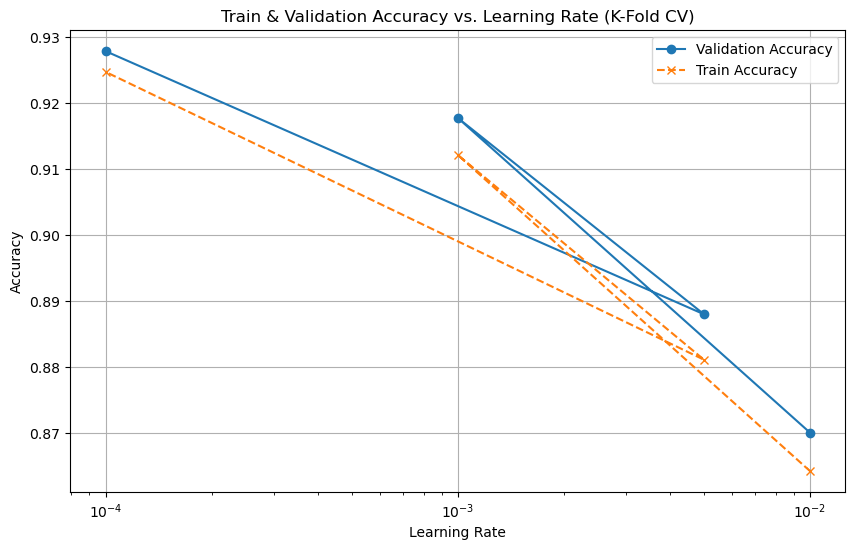

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# List of learning rates to test
learning_rates = [0.01, 0.001, 0.005, 0.0001]

# Initialize lists to store results
train_accuracies_lr = []
val_accuracies_lr = []
training_times_lr = []

# Set up K-fold cross-validation (use StratifiedKFold to maintain class balance across folds)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nStarting K-fold cross-validation for 'learning_rate'...")

# Loop through each learning rate
for lr in learning_rates:
    fold_train_accuracies = []
    fold_val_accuracies = []
    fold_training_times = []
    
    print(f"\nTraining with learning_rate={lr}")
    
    # Perform K-fold cross-validation
    for train_index, val_index in kfold.split(X_train_resampled_df, y_train_resampled):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train_resampled_df.iloc[train_index], X_train_resampled_df.iloc[val_index]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
        
        # Clear previous models from memory to avoid interference
        K.clear_session()
        
        # Create the model with the varying learning rate
        model = create_nn(
            learning_rate=lr,           # Varying the learning rate
            weight_regularizer=0.0001    # Updated regularisation strength based on rpevious plot
        )
        
        # Implement early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        
        # Train the model using K-fold cross-validation
        start_time = time.time()
        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=80,                  # best number of epochs based on coarse analysis
            batch_size=128,             
            callbacks=[early_stopping],
            verbose=1  # Set to 1 to see training progress
        )
        elapsed_time = time.time() - start_time
        
        # Get the last epoch's accuracy for training and validation sets
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]
        
        # Append fold results
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_accuracy)
        fold_training_times.append(elapsed_time)
    
    # Store the average performance over all folds for this learning rate
    train_accuracies_lr.append(np.mean(fold_train_accuracies))
    val_accuracies_lr.append(np.mean(fold_val_accuracies))
    training_times_lr.append(np.mean(fold_training_times))
    
    print(f"Average Train Accuracy: {np.mean(fold_train_accuracies):.4f}, "
          f"Average Validation Accuracy: {np.mean(fold_val_accuracies):.4f}")
    print(f"Average Training Time: {np.mean(fold_training_times):.2f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, val_accuracies_lr, marker='o', label='Validation Accuracy')
plt.plot(learning_rates, train_accuracies_lr, marker='x', label='Train Accuracy', linestyle='--')
plt.xscale('log')  # Log scale for learning rate
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Train & Validation Accuracy vs. Learning Rate (K-Fold CV)')
plt.grid(True)
plt.legend()
plt.show()


It looks like a value of 10^-4 for the learning rate is optimal, based on our results from 5-fold cross validation.

# 4. Trying a tuned Neural Network model

While RandomizedSearchCV is a powerful tool for hyperparameter optimization, it is computationally expensive, especially when dealing with large datasets and complex models like neural networks. Given that we are currently in the exploratory phase of model development, we can build on our coarse analysis and 5-fold cross validation to inform our hyperparameter choices. This allows us to gain valuable insights into the model's performance without excessive computational overhead.

# Let's tune this further, based on what we have seen:

Let's update our model function to consider more hidden layers.

One element which we can consider is the concept of `BatchNormalization`:

* This works by normalising the output of a layer before passing it to the next layer. This ensures that the activations (outputs) within the network are well-scaled and distributed, which can lead to more stable and faster training. 

* It also reduces the risk of vanishing/exploding gradients, which can lead to faster convergence and more accurate models.

We will also experiment with a different acitvation function called `LeakyRelu`. It addresses one of ReLU’s drawbacks: the "dying ReLU" problem. In standard ReLU, any negative input is turned into zero, which can cause some neurons to "die" during training—i.e., they stop updating their weights and never activate again.

With improved gradient flow and no dead neurons, the model may learn more diverse features, which can lead to better test accuracy and overall generalisation.

Importing any additional lubraries required:

In [15]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU


In [16]:
# Create the model with tuned hyperparameters
def create_tuned_nn(learning_rate=0.0001, dropout_rate=0.15, weight_regularizer=0.0001):
    model = Sequential()
    
    # First hidden layer with 128 neurons and Batch Normalization
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(weight_regularizer), input_dim=X_train_resampled_df.shape[1]))
    model.add(LeakyReLU(alpha=0.01))  # Replace ReLU with Leaky ReLU
    model.add(BatchNormalization())  # Normalize activations
    model.add(layers.Dropout(dropout_rate))
    
    # Second hidden layer with 64 neurons and Batch Normalization
    model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(weight_regularizer)))
    model.add(LeakyReLU(alpha=0.01))  # Replace ReLU with Leaky ReLU
    model.add(BatchNormalization())  # Normalise activations
    model.add(layers.Dropout(dropout_rate))
    
    # Third hidden layer with 32 neurons and Batch Normalization
    model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(weight_regularizer)))
    model.add(LeakyReLU(alpha=0.01))  # Replace ReLU with Leaky ReLU
    model.add(BatchNormalization())  # Normalize activations
    model.add(layers.Dropout(dropout_rate))
    
    # Fourth hidden layer (additional) with 16 neurons and Batch Normalization
    model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(weight_regularizer)))
    model.add(LeakyReLU(alpha=0.01))  # Replace ReLU with Leaky ReLU
    model.add(BatchNormalization())  # Normalize activations
    model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(1, activation="sigmoid"))
    
    # Compile the model with Adam optimizer and lower learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

Setting up TensorBoard logs:

In [17]:
import os
log_dir = os.path.abspath("../models/logs/fit/" + time.strftime("%Y%m%d-%H%M%S"))
print(f"TensorBoard logging to: {log_dir}")


TensorBoard logging to: /Users/niveditaprasad/Desktop/capstone_template/models/logs/fit/20240919-202255


And setting up the tensorflow callback:

In [18]:
from tensorflow.keras.callbacks import TensorBoard

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

Now let's run the model,  using our tuned hyperparameters and with the tweaks to the hidden layer of the neural network.

We also add the hyperparameter of `dropout_rate' here which can help address overfitting:

In [19]:
# Tuned hyperparameters
best_learning_rate = 0.0001   # Based on coarse analysis
best_epochs = 30            # Based on coarse analysis
chosen_dropout_rate = 0.15    # Trying out this dropout rate 
best_regularization = 0.0001  # Slightly lower regularization to reduce penalisation, based on coarse analysis

# Clear previous models from memory
tf.keras.backend.clear_session()

# Create the tuned model
model = create_tuned_nn(
    learning_rate=best_learning_rate,
    dropout_rate=chosen_dropout_rate,
    weight_regularizer=best_regularization
)

# Implement early stopping with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(
    X_train_resampled_df, y_train_resampled,
    validation_data=(X_test_scaled_df, y_test),
    epochs=best_epochs,
    batch_size=64,  # Reduced batch size for more frequent updates
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)
# Confirm log directory
print(f"TensorBoard logging to: {log_dir}")

elapsed_time = time.time() - start_time

# Save the model
model.save('../models/best_model_nn.keras')


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7817 - loss: 0.5194 - val_accuracy: 0.8307 - val_loss: 0.4137
Epoch 2/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8461 - loss: 0.3939 - val_accuracy: 0.8372 - val_loss: 0.3986
Epoch 3/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8582 - loss: 0.3664 - val_accuracy: 0.8460 - val_loss: 0.3794
Epoch 4/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8695 - loss: 0.3435 - val_accuracy: 0.8431 - val_loss: 0.3793
Epoch 5/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8773 - loss: 0.3255 - val_accuracy: 0.8575 - val_loss: 0.3507
Epoch 6/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8850 - loss: 0.3067 - val_accuracy: 0.8612 - val_loss: 0.3437
Epoch 7/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8925 - loss: 0.2901 - val_accuracy: 0.8675 - val_loss: 0.3319
Epoch 8/30
5797/5797 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8981 - loss: 0.2754 -

# 5. Model evaluation

Loading the model if it hasn't already been loaded:

In [2]:
from tensorflow.keras.models import load_model

# # Load the best neural network model
best_model_nn = load_model('../models/best_model_nn.keras')

## (a) Train and test accuracy

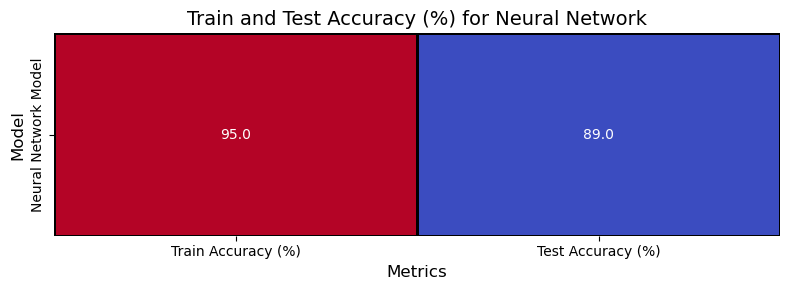

In [21]:
# Evaluate train and test accuracy
train_loss, train_accuracy_nn = best_model_nn.evaluate(X_train_resampled_df, y_train_resampled, verbose=0)
test_loss, test_accuracy_nn = best_model_nn.evaluate(X_test_scaled_df, y_test, verbose=0)

# Accuracy data for neural network
accuracy_data_nn = {
    'Train Accuracy (%)': [train_accuracy_nn * 100],  # Multiply by 100 to get percentage
    'Test Accuracy (%)': [test_accuracy_nn * 100]
}

# Create a DataFrame for neural network accuracy
accuracy_df_nn = pd.DataFrame(accuracy_data_nn, index=['Neural Network Model'])

# Plot a heatmap for neural network accuracy
plt.figure(figsize=(8, 3))
sns.heatmap(accuracy_df_nn, annot=True, fmt='.1f', cmap="coolwarm", cbar=False, linewidths=1, linecolor='black')

# Set labels and title
plt.title("Train and Test Accuracy (%) for Neural Network", fontsize=14)
plt.ylabel("Model", fontsize=12)
plt.xlabel("Metrics", fontsize=12)

plt.tight_layout()
plt.show()


Interestingly, we can see that our Neural Network model doesn't significantly improve on train and test accuracy from the Random Forest model. In fact, its test accuracy is comparable to the single Decision Tree model we constructed earlier.

How does this translate into classification accuracy?

## (b) Confusion matrix and classification report

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step


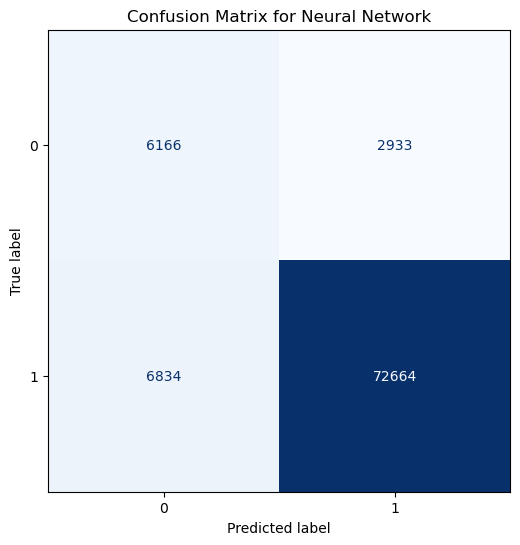

Classification Report for Neural Network Model
              precision    recall  f1-score       support
0              0.474308  0.677657  0.558034   9099.000000
1              0.961202  0.914036  0.937026  79498.000000
accuracy       0.889759  0.889759  0.889759      0.889759
macro avg      0.717755  0.795846  0.747530  88597.000000
weighted avg   0.911198  0.889759  0.898103  88597.000000


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Make predictions on the test set
y_test_pred_nn = (best_model_nn.predict(X_test_scaled_df) > 0.5).astype(int)

# Confusion matrix and classification report
conf_matrix_nn = confusion_matrix(y_test, y_test_pred_nn)
class_report_nn = classification_report(y_test, y_test_pred_nn, output_dict=True)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn)
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.set_title('Confusion Matrix for Neural Network')
plt.grid(False)
plt.show()

# Convert classification report to DataFrame for easy viewing
class_report_df_nn = pd.DataFrame(class_report_nn).transpose()
print("Classification Report for Neural Network Model")
print(class_report_df_nn)

# Key takeaways:



The confusion matrix and classification report for the Neural Network model reveal some interesting performance trends compared to the Random Forest model:

1. For Class 0 (the minority class relating to individuals with 'Low Satisfaction'), the Neural Network demonstrates a significant improvement in **recall** (0.68) compared to the Random Forest model’s recall of 0.54. This means the Neural Network is better at identifying true Class 0 instances, correctly detecting a higher percentage of actual Class 0 cases. 

2. However, the Neural Network's **precision** for Class 0 (0.47) is lower than Random Forest's (0.62), meaning that when the Neural Network predicts Class 0, it is more likely to misclassify other instances as Class 0. As a result, the F1-scores for Class 0 are quite close between the two models (0.56 for Neural Network vs. 0.58 for Random Forest), indicating that **neither model has a clear advantage in overall minority class performance.**

3. For Class 1 (the majority class), it looks like Random Forest model will maintain a slight edge. The Random Forest achieves higher **recall** (0.96) compared to the Neural Network (0.91), meaning it is better at identifying the majority class instances. The **precision** and **F1-scores** for Class 1 are similarly high for both models, with the Random Forest slightly outperforming the Neural Network in terms of these metrics.

While the **overall accuracy** of the Neural Network (88.98%) is lower than that of the Random Forest (91.9%), the improvement in **recall** for Class 0 shows that the Neural Network is better at capturing minority class instances, which is often more important in imbalanced datasets. This improved recall is promising for use cases where detecting the minority class (Class 0) is more critical than maximising overall accuracy. 

* However, the lower precision for Class 0 suggests the need for further tuning, potentially through adjusting hyperparameters, using class weights, or employing other techniques like oversampling to improve performance.

In conclusion, while the Random Forest model has better overall accuracy, the Neural Network shows a promising improvement in recall for the minority class, indicating its potential for applications where identifying the minority class is critical. With additional tuning to address precision, the Neural Network could outperform the Random Forest model in more nuanced ways.


# 6. Conclusion and next steps

The Neural Network model, while slightly trailing behind the Random Forest model in terms of overall accuracy (88.98% vs. 91.9%), demonstrated a notable improvement in **recall for idnetifying indiviudals wiht low satisfaction (Minority Class)**.


* This highlights the Neural Network's ability to better capture instances of the minority class, which is crucial for imbalanced datasets where detecting the less frequent class is often more important than achieving the highest possible accuracy. 

* However, the trade-off comes in the form of **lower precision for Class 0**, indicating that while the model is identifying more minority class instances, it is also introducing more false positives.

This performance suggests that the Neural Network holds **promising potential** in contexts where the focus is on **recall for minority classes**—such as in cases of really understanding who's likely to be less satisfied in their jobs, and where this can have severe consequences in terms of widening disparities in labour market outcomes. 

Further improvements could be made by exploring techniques such as **class weighting**, **oversampling**, or even more advanced architectures to improve precision without sacrificing recall.

In the next notebook, **['09 Evaluation.ipynb'](../notebooks/09%20Evaluation.ipynb)**, we will conduct a more **comprehensive evaluation** of the Neural Network model. This will include further analysis of key performance metrics, comparisons across all models we've built, and next steps for model interpretability and robustness. By doing so, we aim to gain a clearer understanding of the model's strengths, weaknesses, and real-world applicability, setting the stage for potential enhancements and deployment.
